# Trend visualization with plotly

You will visualize the average price (AP) data in the U.S. to explore the change of the price data over the time.

The data set is included and you need to read the description carefully before starting work with it. Here is the link to download: https://www.bls.gov/cpi/data.htm

You need to use plotly (graph object and express) to create all plots in this assignment.

Note: (1) you should create the data for each task, do NOT change the origrinal dataframe for tasks.

(2) There is some messes in the dataset. For example, some columns have white spaces in their names and data is not fully collected.

(3) I will mannually grade your code, so no test case will be provided, but I can give you the expectation of the outcomes for each task.

# Import libraries

In [24]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import plotly.express as px


In [25]:
###BEGIN SOLUTION
#helping functions
def lower_text(df):

#lowcase all text columns in df, returns a df derived from the input 
#df with text columns in lowcase

    df1 = df.select_dtypes(include='object')
    df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else "")
    df_cp = df.copy()
    for c in df1.columns:
        df_cp[c] = df1[c]
    return df_cp


def strip_text(df):
#stip all text columns in df, returns a df derived from the input 
#df with text columns not having any spaces at the beginning and endding

    df1 = df.select_dtypes(include='object')
    df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else "")
    df_cp = df.copy()
    for c in df1.columns:
        df_cp[c] = df1[c]
    return df_cp
###END SOLUTION

# Data preparation
You need to read the dataset from provided files into dataframes. You will need to merge them in following steps.

Try to print out columns, data types, statistics, describe, info, ... of dataframes to understand the data set as much as you can

In [26]:
###BEGIN SOLUTION
df_area = pd.read_csv("./data/BureauLaborStats/AP/ap.area", delimiter = "\t")
df_current = pd.read_csv("./data/BureauLaborStats/AP/ap.data.0.Current", delimiter = "\t")

df_householdfuels = pd.read_csv("./data/BureauLaborStats/AP/ap.data.1.HouseholdFuels", delimiter = "\t")
df_gasoline = pd.read_csv("./data/BureauLaborStats/AP/ap.data.2.Gasoline", delimiter = "\t")
df_food = pd.read_csv("./data/BureauLaborStats/AP/ap.data.3.Food", delimiter = "\t")

df_series = pd.read_csv("./data/BureauLaborStats/AP/ap.series", delimiter = "\t")
df_item = pd.read_csv("./data/BureauLaborStats/AP/ap.item", delimiter = "\t")

df_period = pd.read_csv("./data/BureauLaborStats/AP/ap.period", delimiter = "\t")
df_seasonal = pd.read_csv("./data/BureauLaborStats/AP/ap.seasonal", delimiter = "\t")

df_series['series_title'] = df_series.series_title.str.lower()
df_item['item_name'] = df_item.item_name.str.lower()


###END SOLUTION

/tmp/ipykernel_96079/1869338777.py:7: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [27]:
###BEGIN SOLUTION
df_area.columns    #['area_code', 'area_name']
df_area = strip_text(df_area)
df_area = lower_text(df_area)
df_area.info()

df_current.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_current.columns # ['series_id', 'year', 'period', 'value', 'footnote_codes']
df_current = strip_text(df_current)
df_current = lower_text(df_current)
df_current.value = pd.to_numeric(df_current.value, errors='coerce')
df_current.info()


df_householdfuels.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_householdfuels.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_householdfuels = strip_text(df_householdfuels)
df_householdfuels = lower_text(df_householdfuels)
df_householdfuels.value = pd.to_numeric(df_householdfuels.value, errors='coerce')
df_householdfuels.info()


df_gasoline.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_gasoline.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_gasoline = strip_text(df_gasoline)
df_gasoline = lower_text(df_gasoline)
df_gasoline.value = pd.to_numeric(df_gasoline.value, errors='coerce')
df_gasoline.info()

df_food.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_food.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_food = strip_text(df_food)
df_food = lower_text(df_food)
df_food.value = pd.to_numeric(df_food.value, errors='coerce')
df_food.info()

df_series.rename(columns={"series_id        ": "series_id"}, inplace = True)
df_series.columns #'series_id', 'area_code', 'item_code', 'series_title', 'footnote_codes',
                  #'begin_year', 'begin_period', 'end_year', 'end_period']
df_series = strip_text(df_series)
df_series = lower_text(df_series)
df_series.info()

df_item.columns #['item_code', 'item_name']
df_item = strip_text(df_item)
df_item = lower_text(df_item)
df_item.info()

df_period.columns #['period', 'period_abbr', 'period_name']
df_period = strip_text(df_period)
df_period = lower_text(df_period)
df_period.info()

df_seasonal.columns #['seasonal_code', 'seasonal_text']
df_seasonal = strip_text(df_seasonal)
df_seasonal = lower_text(df_seasonal)
df_seasonal.info()
###END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area_code  74 non-null     object
 1   area_name  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193589 entries, 0 to 193588
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   series_id       193589 non-null  object 
 1   year            193589 non-null  int64  
 2   period          193589 non-null  object 
 3   value           193581 non-null  float64
 4   footnote_codes  0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103977 entries, 0 to 103976
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   s

In [28]:
###BEGIN SOLUTION
df_series_item = pd.merge(df_series, df_item, left_on = 'item_code', right_on ='item_code', how = 'inner' )
df_food_price = pd.merge(df_series_item, df_food, on = ['series_id'], how = 'inner' )
df_gasoline_price = pd.merge(df_series_item, df_gasoline, on = ['series_id'], how = 'inner' )
df_householdfuels_price = pd.merge(df_series_item, df_householdfuels, on = ['series_id'], how = 'inner' )
###END SOLUTION

## Task 1: Average Price (AP) changes over years

We want to see how the price of several items change over years.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 1](./images/task1.png)

709111
709112
709211
709212
709213
fj1101


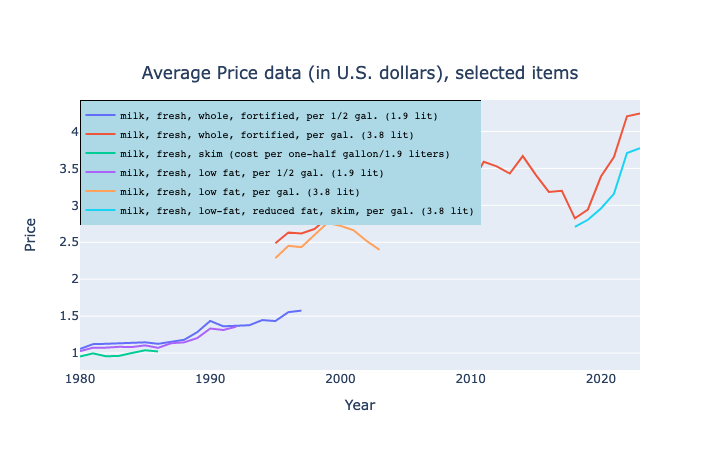

In [38]:
###BEGIN SOLUTION
#Task1
food_names = ['chicken', 'beef', 'pork', 'steak', 'bacon', 'egg', 'milk']

df1 = pd.DataFrame(columns = df_food_price.columns)


for s in food_names:
    df = df_food_price[df_food_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    

df1 = df1.groupby(['item_code', 'year']).agg({'value':'mean'})
df1 = df1.reset_index()
df1 = pd.merge(df1, df_item, on = 'item_code')

uniq_item_codes = df1['item_code'].unique()
uniq_years = df1['year'].unique()

#reserve the item_codes for next task
uniq_item_code_T1 = []

data = []

for ic in uniq_item_codes:
    df = df1[df1['item_code'] == ic]    
    if df.shape[0] < len(uniq_years) - 10:
        continue

        
    print(ic)
    uniq_item_code_T1.append(ic)
    trace = go.Scatter(
                    x = df.year,
                    y = df.value,
                    mode = "lines",
                    name = df['item_name'].values[0],
                    #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df['item_name'].values[0])

    data.append(trace)

layout = go.Layout(
        width=700, height=450,    
        title=go.layout.Title(text='Average Price data (in U.S. dollars), selected items', 
                              y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
        legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                      font=dict(
                                family="Courier",
                                size=10,
                                color="black"),
                      bgcolor="LightBlue",
                      bordercolor="Black",
                      borderwidth=0.5),
        xaxis=dict(title = 'Year', showgrid=False),
        yaxis=dict(title= 'Price', showgrid=True),
        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)
fig.show()
###END SOLUTION

## Task 2: AP changes by areas

More detail: we want to see how the price of items change in each area.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 2](./images/task21.png)
![Task 2](./images/task22.png)
![Task 2](./images/task23.png)
![Task 2](./images/task24.png)
![Task 2](./images/task25.png)

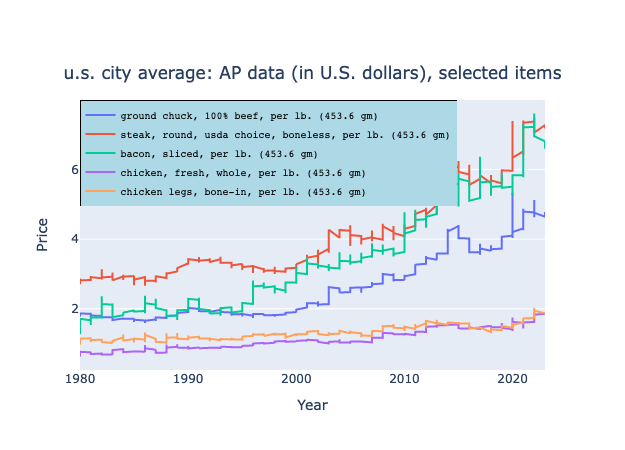

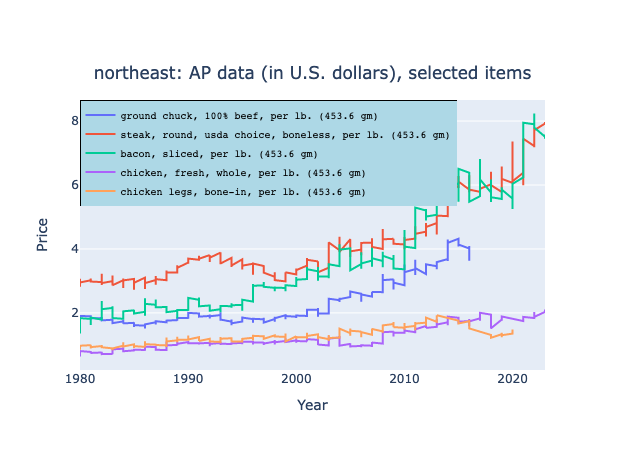

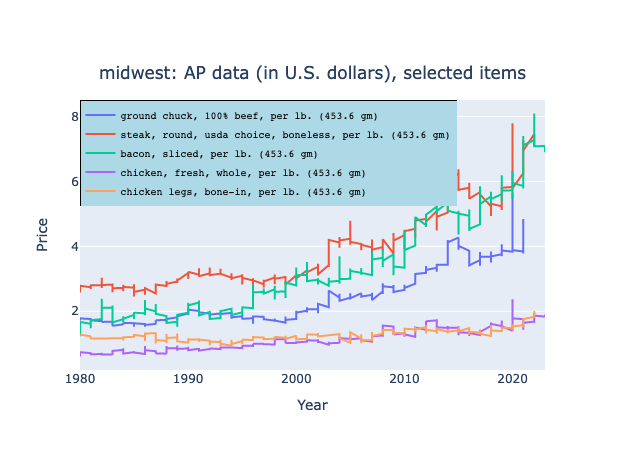

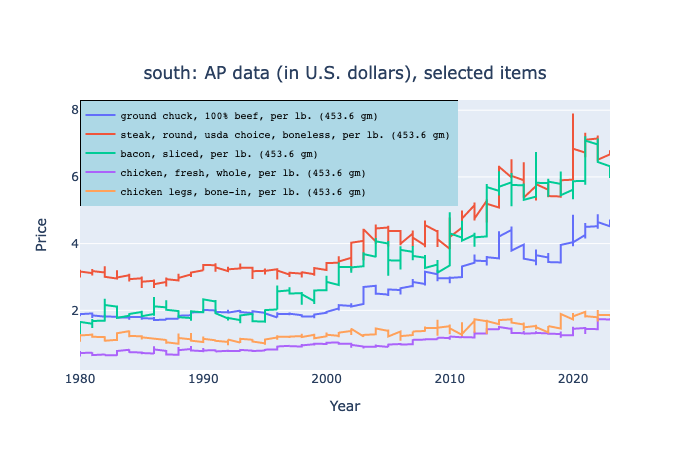

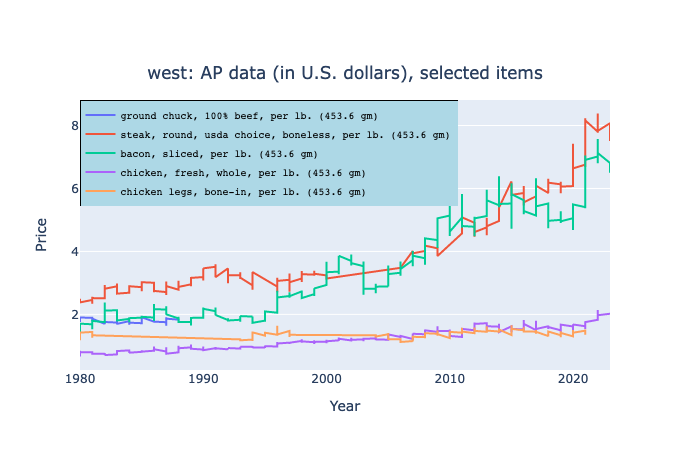

In [30]:
###BEGIN SOLUTION
#Task2

def plot_by_area_code(df):
    
    uniq_item_codes = uniq_item_code_T1 #df['item_code'].unique()
    uniq_years = df['year'].unique()

    data = []
    for ic in uniq_item_codes:
        df1 = df[df['item_code'] == ic].copy()       

        df1.sort_values(by = ['year', 'period'], ascending = True, inplace = True)
        trace = go.Scatter(x = df1.year, y = df1.value,
                        mode = "lines",
                        name = df1['item_name'].values[0],
                        #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df1['item_name'].values[0])

        data.append(trace)

    layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text=df['area_name'].values[0] + ': AP data (in U.S. dollars), selected items', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Year', showgrid=False),
            yaxis=dict(title= 'Price', showgrid=True),
            legend_tracegroupgap=180,
            showlegend=True
        )

    fig = go.Figure(data = data, layout = layout)
    fig.show()
 
    
    
food_names = ['chicken', 'beef', 'pork', 'steak, round', 'bacon']

df1 = pd.DataFrame(columns = df_food_price.columns)
for s in food_names:
    df = df_food_price[df_food_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    

df1 = pd.merge(df1, df_area, on = 'area_code')
uniq_area_codes = df1['area_code'].unique()

for ac in uniq_area_codes:
    df = df1[df1['area_code'] == ac]
    plot_by_area_code(df) 
###END SOLUTION  

## Task 0: Any ideas to make the lines in the above plots smooth

This is a bonus question, you will get up to 20 points for this task.

## Task 3: Any relationship between gasoline price and other items' price?

We want to see if there is a relationship between gasoline and steak price.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 3](./images/task3.png)

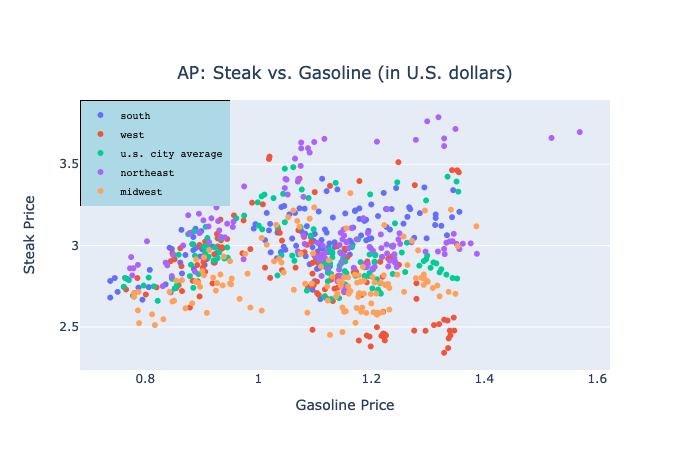

In [31]:
###BEGIN SOLUTION
selected_col = ['area_code','year', 'period', 'value', 'item_code', 'item_name']
years = [1980, 2023]

df31 = df_food_price[selected_col]
df31 = df31[(df31.year >= years[0]) & (df31.year <= years[1])]
df32 = df_gasoline_price[selected_col]
df32 = df32[(df32.year >= years[0]) & (df32.year <= years[1])]

df3 = pd.merge(df31, df32, on = ['area_code', 'year', 'period'], suffixes=('_food', '_gas'), how = 'inner')
#df3

food_item = 'steak, round, usda choice, boneless, per lb. (453.6 gm)'
gas_item = 'gasoline, leaded regular (cost per gallon/3.8 liters)'

df_scatter = df3[(df3['item_name_food'] == food_item) & (df3['item_name_gas'] == gas_item)]
df_scatter = pd.merge(df_scatter, df_area, on = 'area_code')
df_scatter.sort_values(by = ['value_gas'], ascending = True, inplace = True)
uniq_area_codes = df_scatter['area_code'].unique()


data = []

for ac in uniq_area_codes:
        df = df_scatter[df_scatter['area_code'] == ac].copy()       

        trace = go.Scatter(x = df.value_gas, y = df.value_food,
                        mode = "markers",
                        name = df['area_name'].values[0],
                        #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df.year.astype(str))

        data.append(trace)
        
        
        
        
layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text='AP: Steak vs. Gasoline (in U.S. dollars)', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Gasoline Price', showgrid=False),
            yaxis=dict(title= 'Steak Price', showgrid=True),
            showlegend=True
        )

fig = go.Figure(data = data, layout = layout)
fig.show()

###END SOLUTION



## Task 4: Trendline

Let's add a trendline to the above scatter plot for the South area.

Use plotly.express to make things easier https://plotly.com/python/linear-fits/

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 4](./images/task4.png)


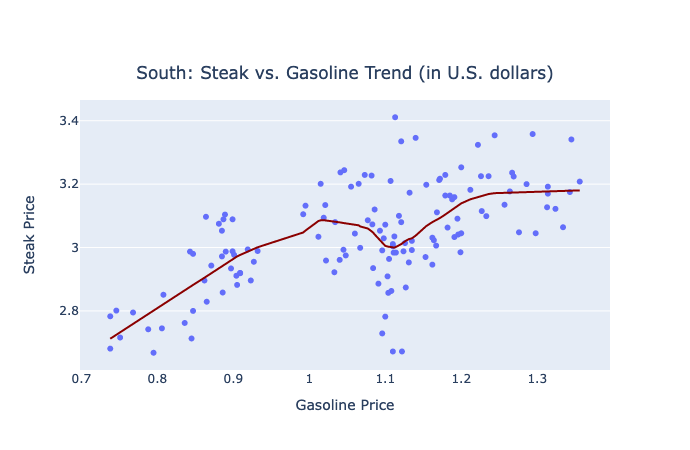

In [35]:

###BEGIN SOLUTION
selected_col = ['area_code','year', 'period', 'value', 'item_code', 'item_name']
years = [1980, 2023]

df31 = df_food_price[selected_col]
df31 = df31[(df31.year >= years[0]) & (df31.year <= years[1])]
df32 = df_gasoline_price[selected_col]
df32 = df32[(df32.year >= years[0]) & (df32.year <= years[1])]

df3 = pd.merge(df31, df32, on = ['area_code', 'year', 'period'], suffixes=('_food', '_gas'), how = 'inner')
#df3

food_item = 'steak, round, usda choice, boneless, per lb. (453.6 gm)'
gas_item = 'gasoline, leaded regular (cost per gallon/3.8 liters)'

df_scatter = df3[(df3['item_name_food'] == food_item) & (df3['item_name_gas'] == gas_item)]
df_scatter = pd.merge(df_scatter, df_area, on = 'area_code')
df_scatter.sort_values(by = ['value_gas'], ascending = True, inplace = True)
uniq_area_codes = ['0300']#df_scatter['area_code'].unique()

data = []

for ac in uniq_area_codes:
    df = df_scatter[df_scatter['area_code'] == ac].copy()
    fig = px.scatter(df, x="value_gas", y="value_food", 
                 trendline="lowess",
                 #trendline_options=dict(log_x=True),
                 trendline_options=dict(frac=0.3),
                 trendline_color_override='darkred',
                 title="Log-transformed fit on linear axes")
    
    layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text='South: Steak vs. Gasoline Trend (in U.S. dollars)', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Gasoline Price', showgrid=False),
            yaxis=dict(title= 'Steak Price', showgrid=True),
            showlegend=True
        )
    fig.update_layout(layout)
    fig.show()
###END SOLUTION    

## Task 5: AP of electricity items

Let's see the price of electricity and household fuels.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 5](./images/task5.png)


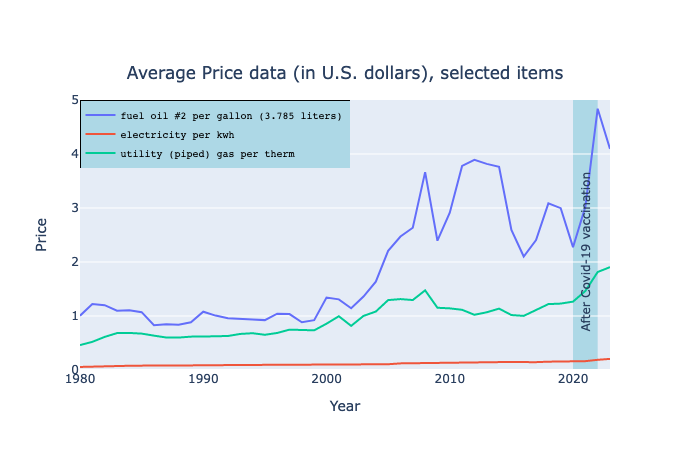

In [33]:
###BEGIN SOLUTION
food_names = [' ']
years = [1980, 2023]

df1 = pd.DataFrame(columns = df_householdfuels_price.columns)
for s in food_names:
    df = df_householdfuels_price[df_householdfuels_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    
df1 = df1[(df1.year >= years[0]) & (df1.year <= years[1])]
df1 = df1.groupby(['item_code', 'year']).agg({'value':'mean'})
df1 = df1.reset_index()
df1 = pd.merge(df1, df_item, on = 'item_code')
uniq_item_codes = df1['item_code'].unique()
uniq_years = df1['year'].unique()

#reserve the item_codes for next task
uniq_item_code_T1 = []

data = []

for ic in uniq_item_codes:
    df = df1[df1['item_code'] == ic]    
    if df.shape[0] < len(uniq_years):
        continue

    uniq_item_code_T1.append(ic)
    trace = go.Scatter(
                    x = df.year,
                    y = df.value,
                    mode = "lines",
                    name = df['item_name'].values[0],
                    text= df['item_name'].values[0])

    data.append(trace)

layout = go.Layout(
        width=700, height=450,    
        title=go.layout.Title(text='Average Price data (in U.S. dollars), selected items', 
                              y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
        legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                      font=dict(
                                family="Courier",
                                size=10,
                                color="black"),
                      bgcolor="LightBlue",
                      bordercolor="Black",
                      borderwidth=0.5),
        xaxis=dict(title = 'Year', showgrid=False),
        yaxis=dict(title= 'Price', range=[0, 5], showgrid=True),
        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)



fig.add_vrect(
    x0=2020, x1=2022,
    #opacity=0.5,
    layer="below", line_width=0,
    fillcolor="lightblue",
    line_color="LightSeaGreen",
)
fig.add_annotation(x=2021, y=2,
            text="After Covid-19 vaccination",
            textangle=-90,
            showarrow=False,
            yshift=10)
fig.show()

###END SOLUTION